In [2]:
import pandas as pd

In [3]:
# (1) Используя параметры pandas прочитать красиво пандас 
file = 'UCI_Credit_Card.csv'
df = pd.read_csv(file) #TODO

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [45]:
#TODO
df.info()
df[['AGE','PAY_0','PAY_2','PAY_3']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

,AGE,PAY_0,PAY_2,PAY_3
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,-0.016700,-0.133767,-0.166200
std,9.217904,1.123802,1.197186,1.196868
min,21.000000,-2.000000,-2.000000,-2.000000
25%,28.000000,-1.000000,-1.000000,-1.000000
50%,34.000000,0.000000,0.000000,0.000000
75%,41.000000,0.000000,0.000000,0.000000
max,79.000000,8.000000,8.000000,8.000000


In [46]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#TODO
len(df[(df['EDUCATION'] == 2) & (df['SEX'] == 2)])

8656

In [125]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
#df[['default.payment.next.month']]
df[[i for i in df.columns if 'BILL_' in i or 'PAY_' in i or i in 'default.payment.next.month']]\
            .groupby(['default.payment.next.month']).median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [73]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
#'SEX', 'EDUCATION', 'MARRIAGE'
df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE', 'count') #TODO

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,4.0,10.0,NaN
1,4.0,3722.0,6809.0,50.0
2,6.0,6842.0,7020.0,162.0
3,44.0,2861.0,1909.0,103.0
4,NaN,52.0,68.0,3.0
5,NaN,150.0,127.0,3.0
6,NaN,28.0,21.0,2.0


In [76]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def frame_е(Limit_bar):
    if Limit_bar <= 10000:
        return 'A'
    if 10000 < Limit_bar <= 100000:
        return 'B'
    if 100000 < Limit_bar <= 200000:
        return 'C'
    if 200000 < Limit_bar <= 400000:
        return 'D'
    if 400000 < Limit_bar <= 700000:
        return 'E'
    if Limit_bar > 700000:
        return 'F'

'F'

In [80]:
df['frame-е'] = df['LIMIT_BAL'].map(frame_е)

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

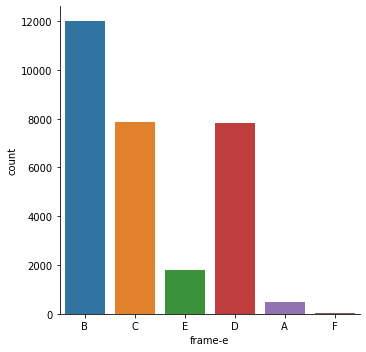

In [107]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
#TODO
sns.factorplot('frame-е', data=df, kind='count')

In [150]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df[['SEX','LIMIT_BAL']].groupby(['SEX']).mean() #TODO
#sns.factorplot('SEX', data=df, kind='mean')

#sns.factorplot('SEX', data=df[['SEX','LIMIT_BAL']], kind = 'mean')
#df[['SEX','LIMIT_BAL']]
#df[['LIMIT_BAL','SEX']].mean().hist()

,LIMIT_BAL
SEX,
1,163519.825034
2,170086.462014


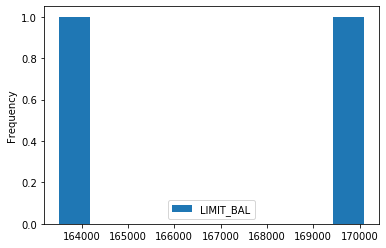

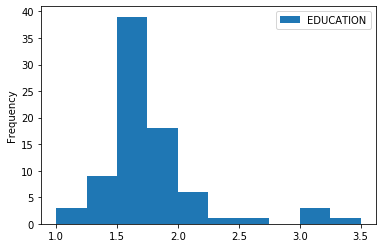

In [161]:
df[['LIMIT_BAL','SEX']].groupby(['SEX']).mean().plot(kind = 'hist')
df[['LIMIT_BAL','EDUCATION']].groupby(['LIMIT_BAL']).mean().plot(kind = 'hist')
plt.show()

In [154]:
df[['EDUCATION','LIMIT_BAL']].groupby(['EDUCATION']).mean() #TODO

,LIMIT_BAL
EDUCATION,
0,217142.857143
1,212956.069910
2,147062.437634
3,126550.270490
4,220894.308943
5,168164.285714
6,148235.294118


In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO